<a href="https://colab.research.google.com/github/kiitaamuuraa/Asobiba/blob/main/HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


In [3]:
data = load_iris()

In [10]:
data.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [31]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(data.data)

In [32]:
clustering.labels_

array([147, 131, 115, 136, 143,  85,  92, 148, 137, 146, 144,  97, 123,
        84, 105, 107, 132, 114, 101, 142,  98,  89, 119, 120, 135, 117,
       118,  67,  77, 141,  76, 138,  82,  78, 108, 129,  75, 111, 112,
       140, 128,  91,  94, 106, 121,  99, 116,  48,  81, 126, 104, 103,
        71,  59, 109,  90, 139,  69,  44,  93,  95, 145,  86, 130, 127,
        64, 122,  96,  52, 110,  47,  73,  70,  79,  58,  57, 149, 124,
        55, 133,  34, 113, 134,  42,  83, 125,  88,  63,  60,  45,  40,
        41,  51, 102,  61,  66, 100,  53,  65,  62,  80,  74,  28,  49,
        39,  50,  20,  24,  38,  68,  56,  29,  30,  46,  23,  36,  33,
        16,  54,  19,  27,  37,  22,  31,  87,   9,  43,  32,  72,  35,
        14,  21,  26,  17,  25,  18,  13,  11,  15,  10,  12,   5,   8,
         4,   6,   7,   3,   2,   1,   0])

In [33]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
import numpy as np


from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [35]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

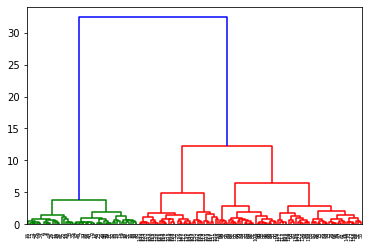

In [36]:
plot_dendrogram(clustering)

In [39]:
clustering.labels_

array([147, 131, 115, 136, 143,  85,  92, 148, 137, 146, 144,  97, 123,
        84, 105, 107, 132, 114, 101, 142,  98,  89, 119, 120, 135, 117,
       118,  67,  77, 141,  76, 138,  82,  78, 108, 129,  75, 111, 112,
       140, 128,  91,  94, 106, 121,  99, 116,  48,  81, 126, 104, 103,
        71,  59, 109,  90, 139,  69,  44,  93,  95, 145,  86, 130, 127,
        64, 122,  96,  52, 110,  47,  73,  70,  79,  58,  57, 149, 124,
        55, 133,  34, 113, 134,  42,  83, 125,  88,  63,  60,  45,  40,
        41,  51, 102,  61,  66, 100,  53,  65,  62,  80,  74,  28,  49,
        39,  50,  20,  24,  38,  68,  56,  29,  30,  46,  23,  36,  33,
        16,  54,  19,  27,  37,  22,  31,  87,   9,  43,  32,  72,  35,
        14,  21,  26,  17,  25,  18,  13,  11,  15,  10,  12,   5,   8,
         4,   6,   7,   3,   2,   1,   0])